# **Philippine Scam SMS**
**Phase 2: Natural Language Processing**

**Author/s: [Anton Reyes](https://www.github.com/AGR-yes)**

## **Introduction**

### **Requirements and Imports**

#### **Imports**

**Basic Libraries**

* `numpy` contains a large collection of mathematical functions
* `pandas` contains functions that are designed for data manipulation and data analysis

In [67]:
import numpy as np
import pandas as pd

**Visualization Libraries**

* `matplotlib.pyplot` contains functions to create interactive plots
* `seaborn` is a library based on matplotlib that allows for data visualization
* `plotly` is an open-source graphing library for Python.

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

**Natural Language Processing Libraries**
* `re` is a module that allows the use of regular expressions
* `spaCy` is an NLP library for "understand" lrge volumes of text
* `WordCloud` is a tool to show the most frequently used word in the dataset
* `NLTK` is an open-source library for NLP and linguistics
* `scikit-learn` is a library for machine learning models and statistical modeling

In [69]:
import re
import spacy
from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### **Datasets and Files**

The following files were used for this project:

- `proof.csv` contains features `proof` and `name` only after Phase 1. This does not contain the type of spam and lacks classification.
- `genediazjr-tagalog.txt` used to add _Tagalog_ Stopwords for NLP


## **Data Collection**

Importing the dataset using pandas.

In [70]:
dataset = "Processed Datasets\proof.csv"

proof = pd.read_csv(dataset)
proof.tail()

,proof,name,type
5037,"Araw-araw na suweld0 5000, kai1angan lang ng 1...",False,NaN
5038,Goodnews! VIP perks at SUGARPLAY Sign up & Cla...,False,NaN
5039,Start referring & earning at SUGARPLAY Earn e...,True,NaN
5040,", Experience the thrill at JackpotCity! Enjoy ...",True,NaN
5041,", Get 5% Deposit bonus using PAYMAYA at UNIBET...",True,NaN


## **Description of the Dataset**

Here, we find the shape of the dataset.

In [71]:
proof.shape

(5042, 3)

By looking at the `info` of the dataframe, we can see that there are `non-null` values. 

In [72]:
proof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   proof   1414 non-null   object
 1   name    5042 non-null   bool  
 2   type    4679 non-null   object
dtypes: bool(1), object(2)
memory usage: 83.8+ KB


## **Exploratory Data Analysis (Raw Text)**

### **Wordcloud**


In [73]:
#get non-null values
proof_filtered = proof[proof['proof'].notnull()].reset_index(drop=True)
proof_filtered

,proof,name,type
0,POEA,False,others
1,POEA,False,others
2,Federal Partylist,False,political
3,Build Build Build,False,political
4,luckyphil.com/login,False,lotto
...,...,...,...
1409,"Araw-araw na suweld0 5000, kai1angan lang ng 1...",False,NaN
1410,Goodnews! VIP perks at SUGARPLAY Sign up & Cla...,False,NaN
1411,Start referring & earning at SUGARPLAY Earn e...,True,NaN
1412,", Experience the thrill at JackpotCity! Enjoy ...",True,NaN


In [74]:
proof_filtered['proof'] = [str(value) for value in proof_filtered['proof']]

In [75]:
proof_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   proof   1414 non-null   object
 1   name    1414 non-null   bool  
 2   type    1228 non-null   object
dtypes: bool(1), object(2)
memory usage: 23.6+ KB


In [76]:
text = " ".join(i for i in proof_filtered.proof)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

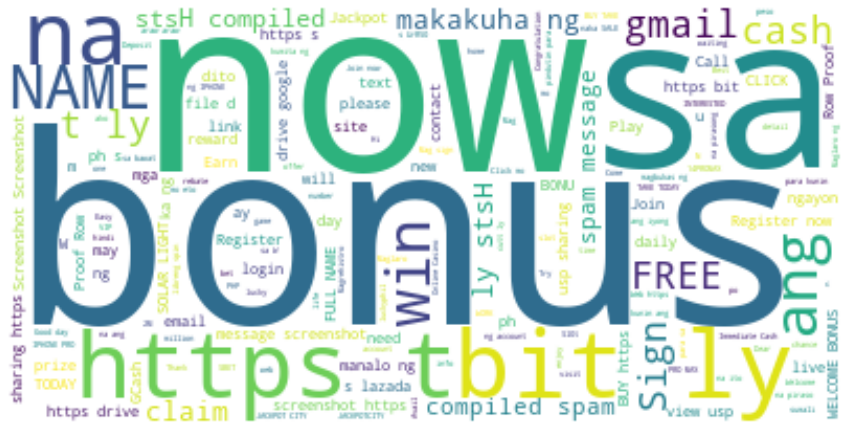

In [77]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **Top Words**

In [78]:
#get top 25 words with count into a dataframe
raw_top25 = pd.DataFrame(FreqDist(text.split()).most_common(25), columns=['word','count'])

raw_top25

,word,count
0,ng,336
1,to,323
2,at,314
3,and,262
4,sa,242
5,na,229
6,ang,173
7,up,155
8,for,148
9,you,136


We can see that a lot of the punctuation were considered as a word and that there is a mix of stopwords in both the English and Tagalog language.

## **Natural Language Processing**

### **Text Cleaning**

#### **Stopwords Preparation**

In [79]:
#list of stopwords
en_stopwords = set(STOPWORDS)
en_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [80]:
#import txt as list
with open('Supplemental Datasets\genediazjr-tagalog.txt', 'r') as f:
    tl_stopwords = f.read().splitlines()

tl_stopwords

['ako',
 'sa',
 'akin',
 'ko',
 'aking',
 'sarili',
 'kami',
 'atin',
 'ang',
 'aming',
 'amin',
 'ating',
 'ka',
 'iyong',
 'iyo',
 'inyong',
 'siya',
 'kanya',
 'mismo',
 'ito',
 'nito',
 'kanyang',
 'sila',
 'nila',
 'kanila',
 'kanilang',
 'kung',
 'ano',
 'alin',
 'sino',
 'kanino',
 'na',
 'mga',
 'iyon',
 'am',
 'ay',
 'maging',
 'naging',
 'mayroon',
 'may',
 'nagkaroon',
 'pagkakaroon',
 'gumawa',
 'ginagawa',
 'ginawa',
 'paggawa',
 'ibig',
 'dapat',
 'maaari',
 'marapat',
 'kong',
 'ikaw',
 'tayo',
 'hindi',
 'namin',
 'gusto',
 'nais',
 'niyang',
 'nilang',
 'niya',
 'huwag',
 'ginawang',
 'gagawin',
 'maaaring',
 'sabihin',
 'narito',
 'kapag',
 'ni',
 'nasaan',
 'bakit',
 'paano',
 'kailangan',
 'walang',
 'katiyakan',
 'isang',
 'at',
 'pero',
 'o',
 'dahil',
 'bilang',
 'hanggang',
 'habang',
 'ng',
 'pamamagitan',
 'para',
 'tungkol',
 'laban',
 'pagitan',
 'panahon',
 'bago',
 'pagkatapos',
 'itaas',
 'ibaba',
 'mula',
 'pataas',
 'pababa',
 'palabas',
 'ibabaw',
 'il

In [81]:
#add 'mo' and 'lang' to tl_stopwords
tl_stopwords.extend(['mo', 'lang'])

In [82]:
#merging en_stopwords and tl_stopwords
stopwords = en_stopwords.union(tl_stopwords)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'akin',
 'aking',
 'ako',
 'alin',
 'all',
 'also',
 'am',
 'amin',
 'aming',
 'an',
 'and',
 'ang',
 'ano',
 'anumang',
 'any',
 'apat',
 'are',
 "aren't",
 'as',
 'at',
 'atin',
 'ating',
 'ay',
 'bababa',
 'bago',
 'bakit',
 'bawat',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'bilang',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'dahil',
 'dalawa',
 'dapat',
 'did',
 "didn't",
 'din',
 'dito',
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'doon',
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'gagawin',
 'gayunman',
 'get',
 'ginagawa',
 'ginawa',
 'ginawang',
 'gumawa',
 'gusto',
 'habang',
 'had',
 "hadn't",
 'hanggang',
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'hindi',
 'his',
 'how',
 "how

#### **Removing Stopwords**

In [83]:
#remove stopwords from dataset
text_only = proof_filtered.copy()

text_only['proof'] = text_only['proof'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

text_only.head()

,proof,name,type
0,POEA,False,others
1,POEA,False,others
2,Federal Partylist,False,political
3,Build Build Build,False,political
4,luckyphil.com/login,False,lotto


In [84]:
#remove STOPWORDS from dataframe
text_only = text_only[text_only['proof'].notnull()].reset_index(drop=True)
text_only

,proof,name,type
0,POEA,False,others
1,POEA,False,others
2,Federal Partylist,False,political
3,Build Build Build,False,political
4,luckyphil.com/login,False,lotto
...,...,...,...
1409,"Araw-araw suweld0 5000, kai1angan 1-2 oras is@...",False,NaN
1410,Goodnews! VIP perks SUGARPLAY Sign & Claim PHP...,False,NaN
1411,Start referring & earning SUGARPLAY Earn everd...,True,NaN
1412,", Experience thrill JackpotCity! Enjoy 5% USDT...",True,NaN


#### **Removing Punctuation and Other Strings**

In [85]:
#remove punctuations from dataframe
text_only['proof'] = text_only['proof'].str.replace('[^\w\s]','')
text_only

C:\Users\Mos\AppData\Local\Temp\ipykernel_20416\2214577564.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  text_only['proof'] = text_only['proof'].str.replace('[^\w\s]','')


,proof,name,type
0,POEA,False,others
1,POEA,False,others
2,Federal Partylist,False,political
3,Build Build Build,False,political
4,luckyphilcomlogin,False,lotto
...,...,...,...
1409,Arawaraw suweld0 5000 kai1angan 12 oras isng a...,False,NaN
1410,Goodnews VIP perks SUGARPLAY Sign Claim PHP14...,False,NaN
1411,Start referring earning SUGARPLAY Earn everda...,True,NaN
1412,Experience thrill JackpotCity Enjoy 5 USDT De...,True,NaN


In [86]:
remove = ['httpstlystsH','https://t.ly/stsH','https','&', 'amp', 'amp;', 'tly', 't', 'ly', 'co', 'com', 'www', 'http']

#removing words from dataframe with `remove`
text_only['proof'] = text_only['proof'].apply(lambda x: ' '.join([word for word in x.split() if word not in (remove)]))

#removing single letters with regex
text_only['proof'] = text_only['proof'].str.replace(r'\b[a-zA-Z]\b', '')

C:\Users\Mos\AppData\Local\Temp\ipykernel_20416\2517495946.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  text_only['proof'] = text_only['proof'].str.replace(r'\b[a-zA-Z]\b', '')


### **Classification**

In the `spam.csv` dataset, the needed features such as the `proof` and the `name` are present. However, to add more to the analysis, we can do classification through machine learning with Natural Language Processing techniques.

### **Preparation**

#### **Tokenizing**

In [87]:
text_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   proof   1414 non-null   object
 1   name    1414 non-null   bool  
 2   type    1228 non-null   object
dtypes: bool(1), object(2)
memory usage: 23.6+ KB


In [88]:
text_only.isnull().sum()

proof      0
name       0
type     186
dtype: int64

In [89]:
text_only['proof'] = text_only['proof'].astype(str).str.lower()

In [90]:
# Gather all the text
txt = ' '.join(text_only['proof'])
# Tokenize abstracts
tokens = word_tokenize(txt)
# Removing stopwords
text_clean = [word for word in tokens if word not in stopwords]

In [92]:
text_only.tail()

,proof,name,type
1409,arawaraw suweld0 5000 kai1angan 12 oras isng a...,False,NaN
1410,goodnews vip perks sugarplay sign claim php148...,False,NaN
1411,start referring earning sugarplay earn everday...,True,NaN
1412,experience thrill jackpotcity enjoy 5 usdt dep...,True,NaN
1413,get 5 deposit bonus using paymaya unibet invit...,True,NaN


#### **Classifier**

In [ ]:
#separating the dataset into labelled and unlabelled
no_label = text_only[text_only['type'].isnull()].reset_index(drop=True)

labelled = text_only[text_only['type'].notnull()].reset_index(drop=True)

#### **Class Merging**

From the `phase 1` notebook, the labels in the select dataset were originally unclean. But after cleaning, the labels (or classes) were organized. However, to have a better accuracy score, we would need to filter the labels one more time.

In [ ]:
labelled['type'].value_counts()

others             241
casino/gambling    181
money               98
not specified       89
online games        82
loan/bank           70
raffle/play         58
products            56
work                55
claiming            46
email               44
platform            42
online shopping     31
job offer           30
free                27
rewards             13
deposit scam        12
raffle              12
netflix             10
passive income       7
lotto                7
political            6
gcash                6
unclaimed bonus      4
fake news            1
Name: type, dtype: int64

In [ ]:
#changing the text in type column to another stringwith dictionary
labelled['type'] = labelled['type'].replace(['money', 'gcash', 'loan/bank', 'deposit scam'], "bank/money")
labelled['type'] = labelled['type'].replace(['raffle/play', 'lotto', 'raffle', 'claiming'], "casino/gambling")
labelled['type'] = labelled['type'].replace(['job offer','passive income'], "work")
labelled['type'] = labelled['type'].replace(['online shopping', 'email', 'netflix', 'online games','platform'], "online activity")
labelled['type'] = labelled['type'].replace(['products', 'free', 'rewards'], "free")
labelled['type'] = labelled['type'].replace(['not specified', 'unclaimed bonus','fake news', 'political'], "others")

labelled['type'].value_counts()

others             341
casino/gambling    304
online activity    209
bank/money         186
free                96
work                92
Name: type, dtype: int64

### **Feature Extraction**

In [ ]:
#Splitting the dataset into train and test

X = labelled['token']
y = labelled['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=None, 
                                                    random_state=42)

**Vectorizing**

In [ ]:
X_train = [' '.join(tokens) for tokens in X_train]
X_test = [' '.join(tokens) for tokens in X_test]

# Creating the vectorizer
vectorizer = TfidfVectorizer()

# Fitting the vectorizer on the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transforming the testing data using the fitted vectorizer
X_test_tfidf = vectorizer.transform(X_test)


**Label Encoding**

In [ ]:
label_encoder = LabelEncoder()

# Fit the encoder on the target variable
label_encoder.fit(y_train)

# Transform the target variable into numerical labels
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

**Classifier**

Here, we check for the accuracy score for the labelled dataset with the different possible models

In [ ]:
# Initialize the classifiers
classifiers = [
    MultinomialNB(),
    SVC(),
    RandomForestClassifier(),
    LogisticRegression()
]

# Train and evaluate each classifier
for classifier in classifiers:
    # Train the classifier on the vectorized training data
    classifier.fit(X_train_tfidf, y_train_encoded)
    
    # Predict the labels for the testing data
    y_pred = classifier.predict(X_test_tfidf)
    
    # Compute accuracy
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(classifier.__class__.__name__, "Accuracy:", round(accuracy*100, 2), "%")


MultinomialNB Accuracy: 45.12 %
SVC Accuracy: 46.34 %
RandomForestClassifier Accuracy: 50.0 %
LogisticRegression Accuracy: 45.53 %


Since all the accuracy scores are quite low, I'll be using the model with the highest score: `RandomForestClassifier()`. Though typically we would go for higher scores, resources for a project with a topic like this, is quite limited - especially in the Philippines.

## **Exploratory Data Analysis (Cleaned Text)**

### **WordCloud**

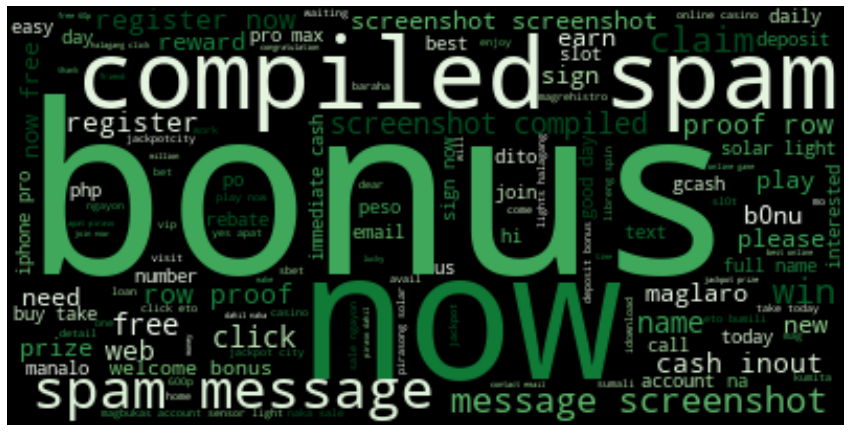

In [ ]:
#wordcloud
text = " ".join(i for i in df_text.proof)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black", colormap = "Greens").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **Top Words**

In [ ]:
#top 100 words with count from dataframe
top = pd.DataFrame(FreqDist(text_only['proof'].str.cat(sep=' ').split()).most_common(100), columns=['word','count'])
top

,word,count
0,bonus,211
1,now,206
2,cash,126
3,free,113
4,name,107
...,...,...
95,interested,26
96,vip,25
97,immediate,25
98,text,24


# **Saving**

In [ ]:
#top.to_csv('Processed Datasets/top100_words.csv', index=False)
#text_only.to_csv('Processed Datasets/proof_cleaned.csv', index=False)

#saving wordcloud as png
#wordcloud.to_file('wordcloud.png')

In [ ]:
no_label

,proof,name,type,token
0,httpabgamingartirw,False,NaN,[httpabgamingartirw]
1,http09770263928sitebzes1j,False,NaN,[http09770263928sitebzes1j]
2,idownload ako bigyan kita 10 sumali team mayam...,False,NaN,"[idownload, ako, bigyan, kita, 10, sumali, tea..."
3,onlinebetphlivegame,False,NaN,[onlinebetphlivegame]
4,sms pass my full name pidn b04796 a3adults com...,False,NaN,"[sms, pass, my, full, name, pidn, b04796, a3ad..."
...,...,...,...,...
181,arawaraw suweld0 5000 kai1angan 12 oras isng a...,False,NaN,"[arawaraw, suweld0, 5000, kai1angan, 12, oras,..."
182,goodnews vip perks sugarplay sign claim php148...,False,NaN,"[goodnews, vip, perks, sugarplay, sign, claim,..."
183,start referring earning sugarplay earn everday...,True,NaN,"[start, referring, earning, sugarplay, earn, e..."
184,experience thrill jackpotcity enjoy 5 usdt dep...,True,NaN,"[experience, thrill, jackpotcity, enjoy, 5, us..."


In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train_tfidf, y_train_encoded)

RandomForestClassifier()

In [ ]:
new_data=no_label.copy()

In [ ]:
new_data['type'] = new_data['type'].fillna('')

In [ ]:
X_new = new_data['type']

X_new_tfidf = vectorizer.transform(X_new)

# Make predictions using the loaded model
predictions = model.predict(X_new_tfidf)

# Add the predicted classes to the new DataFrame
new_data['predicted_class'] = predictions

# View the predicted classes
print(new_data['predicted_class'])

0      1
1      1
2      1
3      1
4      1
      ..
181    1
182    1
183    1
184    1
185    1
Name: predicted_class, Length: 186, dtype: int32


In [ ]:
# Fill any missing values with an empty string
new_data['proof'] = new_data['proof'].fillna('')

# Apply the same preprocessing steps as used during training
# ...

# Extract the features from the new DataFrame
X_new = new_data['proof'].astype(str)  # Replace "feature_column" with the appropriate column name

# Preprocess the features
# ...

# Vectorize the new data using the same vectorizer from training
X_new_tfidf = vectorizer.transform(X_new)

# Make predictions using the loaded model
predictions = model.predict(X_new_tfidf)

# Map numeric labels back to original class labels
predicted_classes = [label_encoder.inverse_transform([label])[0] for label in predictions]

# Add the predicted classes to the new DataFrame
new_data['predicted_class'] = predicted_classes

# View the predicted classes
print(new_data['predicted_class'])

0      casino/gambling
1      casino/gambling
2               others
3      casino/gambling
4               others
            ...       
181             others
182    casino/gambling
183    casino/gambling
184    casino/gambling
185             others
Name: predicted_class, Length: 186, dtype: object


In [ ]:
new_data['predicted_class'].value_counts() #svc

casino/gambling    93
others             71
online activity    14
bank/money          7
work                1
Name: predicted_class, dtype: int64

In [ ]:
new_data['predicted_class'].value_counts() #lr

casino/gambling    93
others             71
online activity    14
bank/money          7
work                1
Name: predicted_class, dtype: int64

In [ ]:
new_data['predicted_class'].value_counts() #rfc

casino/gambling    93
others             71
online activity    14
bank/money          7
work                1
Name: predicted_class, dtype: int64

In [ ]:
new_data

,proof,name,type,token,predicted_class
0,httpabgamingartirw,False,,[httpabgamingartirw],casino/gambling
1,http09770263928sitebzes1j,False,,[http09770263928sitebzes1j],casino/gambling
2,idownload ako bigyan kita 10 sumali team mayam...,False,,"[idownload, ako, bigyan, kita, 10, sumali, tea...",others
3,onlinebetphlivegame,False,,[onlinebetphlivegame],casino/gambling
4,sms pass my full name pidn b04796 a3adults com...,False,,"[sms, pass, my, full, name, pidn, b04796, a3ad...",others
...,...,...,...,...,...
181,arawaraw suweld0 5000 kai1angan 12 oras isng a...,False,,"[arawaraw, suweld0, 5000, kai1angan, 12, oras,...",others
182,goodnews vip perks sugarplay sign claim php148...,False,,"[goodnews, vip, perks, sugarplay, sign, claim,...",casino/gambling
183,start referring earning sugarplay earn everday...,True,,"[start, referring, earning, sugarplay, earn, e...",casino/gambling
184,experience thrill jackpotcity enjoy 5 usdt dep...,True,,"[experience, thrill, jackpotcity, enjoy, 5, us...",casino/gambling
